In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
#Set the font family and size to use for Matplotlib figures
pyplot.rcParams['font.family']='serif'
pyplot.rcParams['font.size']=16

In [3]:
def rho_red_light(x, rho_max):
    rho=rho_max*numpy.ones_like(x)
    mask = numpy.where(x<3.0)
    rho[mask]=0.5*rho_max
    return rho

In [4]:
#Set parameters
nx=81 #number of locations on the road
L = 4.0 #length of the road
dx = L/(nx-1) #distance between two consecutive locations
nt = 40 #number of time steps to compute
u_max = 1.0 #max speed allowed on the road
rho_max = 10.0 #max car density allowed on the road

#Discretize the road
x=numpy.linspace(0.0,L, num=nx)

#Compute the initial traffic density
rho0 = rho_red_light(x, rho_max)

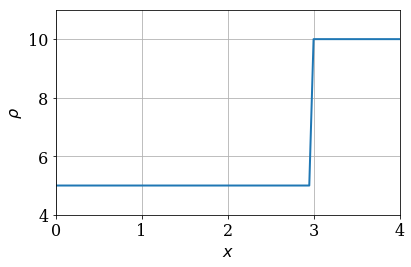

In [5]:
# Plot the initial traffic density.
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0,
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(4.0, 11.0)
pyplot.tight_layout()

In [6]:
def flux(rho, u_max, rho_max):
    F=rho*u_max*(1.0-rho/rho_max)
    return F

In [7]:
def update_plot(n, rho_hist):
    pyplot.figure()
    pyplot.xlabel('Distance [km]')
    pyplot.ylabel('Density [cars/km]')
    pyplot.grid()
    pyplot.plot(x,rho_hist[0], label='Initial')
    pyplot.plot(x,rho_hist[n], label='Time step{}'.format(n))
    pyplot.ylim(rho_hist[0].min()-1.0, rho_hist[0].max()+1.0)
    pyplot.legend()

In [8]:
def lax_friedrichs(rho0, nt, dt, dx, bc_values, *args):
    rho_hist=[rho0.copy()]
    rho=rho0.copy()
    for n in range (nt):
        #Compute the flux
        F=flux(rho,*args)
        #Advance in time using Lax-Friedrichs scheme.
        rho[1:-1]=(0.5*(rho[:-2]+rho[2:]-dt/(2.0*dx)*(F[2:]-F[:-2])))
        #Set the value at the first location
        rho[0]=bc_values[0]
        #Set the value at the last location
        rho[-1] = bc_values[1]
        #Record the time-step solution
        rho_hist.append(rho.copy())
    return rho_hist

In [9]:
#Set the time-step size based on CFL limit
sigma = 1.0
dt = sigma*dx/u_max #time-step size

#compute the traffic density at all time steps
rho_hist=lax_friedrichs(rho0, nt, dt, dx, (rho0[0], rho0[-1]), u_max, rho_max)

In [10]:
import ipywidgets
nt_slider=ipywidgets.IntSlider(value=0, min=0, max=nt, step=1, description='time step')
display(ipywidgets.interactive(update_plot, n=nt_slider, rho_hist=ipywidgets.fixed(rho_hist)))

interactive(children=(IntSlider(value=0, description='time step', max=40), Output()), _dom_classes=('widget-in…

In [11]:
#Set the time-step size based on CFL limit
sigma = 0.5
dt = sigma*dx/u_max #time-step size

#compute the traffic density at all time steps
rho_hist=lax_friedrichs(rho0, nt, dt, dx, (rho0[0], rho0[-1]), u_max, rho_max)

In [12]:
import ipywidgets
nt_slider=ipywidgets.IntSlider(value=0, min=0, max=nt, step=1, description='time step')
display(ipywidgets.interactive(update_plot, n=nt_slider, rho_hist=ipywidgets.fixed(rho_hist)))

interactive(children=(IntSlider(value=0, description='time step', max=40), Output()), _dom_classes=('widget-in…

In [13]:
def jacobian(rho, u_max, rho_max):
    J = u_max*(1.0-2.0*rho/rho_max)
    return J

In [14]:
def lax_wendroff(rho0, nt, dt, dx, bc_values, *args):
    rho_hist = [rho0.copy()]
    rho=rho0.copy()
    for n in range(nt):
        #Compute the flux
        F=flux(rho, *args)
        #Compute the Jacobian
        J=jacobian(rho, *args)
        #Advance in time using Lax-Wendroff scheme
        rho[1:-1]=(rho[1:-1]-dt/(2.0*dx)*(F[2:]-F[:-2])+dt**2/(4.0*dx**2)*((J[1:-1]+J[2:])*(F[2:]-F[1:-1])-(J[:-2]+J[1:-1])*(F[1:-1]-F[:-2])))
        #Set the value at the first location
        rho[0]=bc_values[0]
        #Set the value at the last location
        rho[-1]=bc_values[1]
        #Record the time-step solution
        rho_hist.append(rho.copy())
    return rho_hist

In [15]:
#Set the time-step size based on CFL limit
sigma = 1.0
dt = sigma*dx/u_max #time-step size

#compute the traffic density at all time steps
rho_hist=lax_wendroff(rho0, nt, dt, dx, (rho0[0], rho0[-1]), u_max, rho_max)

In [16]:
import ipywidgets
nt_slider=ipywidgets.IntSlider(value=0, min=0, max=nt, step=1, description='time step')
display(ipywidgets.interactive(update_plot, n=nt_slider, rho_hist=ipywidgets.fixed(rho_hist)))

interactive(children=(IntSlider(value=0, description='time step', max=40), Output()), _dom_classes=('widget-in…

In [17]:
#Set the time-step size based on CFL limit
sigma = 0.5
dt = sigma*dx/u_max #time-step size

#compute the traffic density at all time steps
rho_hist=lax_wendroff(rho0, nt, dt, dx, (rho0[0], rho0[-1]), u_max, rho_max)

In [27]:
import ipywidgets
nt_slider=ipywidgets.IntSlider(value=0, min=0, max=nt, step=1, description='time step')
display(ipywidgets.interactive(update_plot, n=nt_slider, rho_hist=ipywidgets.fixed(rho_hist)))

interactive(children=(IntSlider(value=0, description='time step', max=40), Output()), _dom_classes=('widget-in…

In [30]:
def maccormack(rho0, nt, dt, dx, bc_values, *args):
    rho_hist=[rho0.copy()]
    rho=rho0.copy()
    rho_star=rho.copy()
    for n in range (nt):
        #compute the flux
        F=flux(rho, *args)
        #Predictor step of the MacCormack scheme
        rho_star[1:-1]=(rho[1:-1]-dt/dx*(F[2:]-F[1:-1]))
        #Compute the flux
        F = flux(rho_star, *args)
        # Corrector step of the MacCormack scheme.
        rho[1:-1] = 0.5 * (rho[1:-1] + rho_star[1:-1] - dt / dx * (F[1:-1] - F[:-2]))
        # Set the value at the first location.
        rho[0] = bc_values[0]
        # Set the value at the last location.
        rho[-1] = bc_values[1]
        # Record the time-step solution.
        rho_hist.append(rho.copy())
    return rho_hist

In [31]:
#Set the time-step size based on CFL limit
sigma = 1.0
dt = sigma*dx/u_max #time-step size

#compute the traffic density at all time steps
rho_hist = maccormack(rho0, nt, dt, dx, (rho0[0], rho0[-1]), u_max, rho_max)

In [ ]:
import ipywidgets
nt_slider=ipywidgets.IntSlider(value=0, min=0, max=nt, step=1, description='time step')
display(ipywidgets.interactive(update_plot, n=nt_slider, rho_hist=ipywidgets.fixed(rho_hist)))